## Daquar dataset

In [1]:
# Analyze the unique answers for each answer space
from config.datasets.daquar import PROCESSED_DAQUAR_PATH, PROCESSED_DAQUAR_DATA_FILES
import pandas as pd

all_daquar_answers_df = pd.DataFrame(
    pd.concat(
        [
            pd.read_csv(PROCESSED_DAQUAR_PATH / processed_file)
            for processed_file in PROCESSED_DAQUAR_DATA_FILES
        ],
        ignore_index=True,
    )["answer"]
)

In [2]:
# Analyze the answers count
daquar_answers_counts = all_daquar_answers_df["answer"].value_counts()

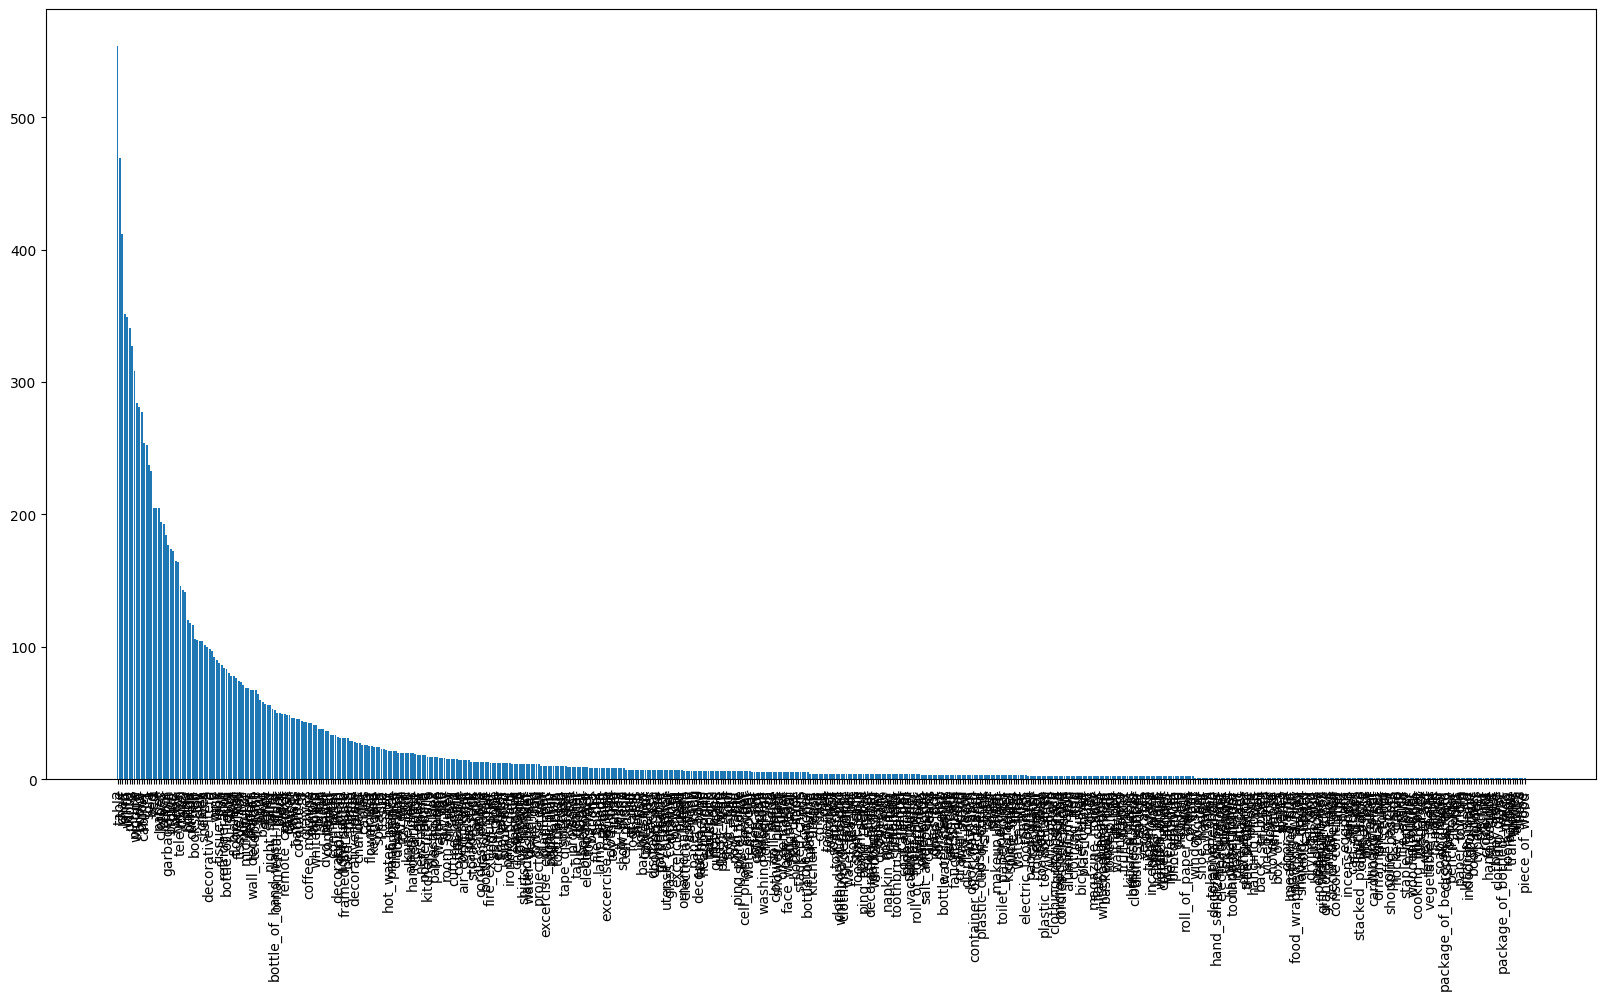

In [3]:
# Plot the answers count as a bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.bar(daquar_answers_counts.index, daquar_answers_counts.values)
plt.xticks(rotation=90)
plt.show()

In [9]:
# Find the words with probability being spotted no less than 0.95
daquar_answers_counts_df = pd.DataFrame(
    {"answer": daquar_answers_counts.index, "count": daquar_answers_counts.values}
)
daquar_answers_counts_df

,answer,count
0,2,554
1,table,469
2,chair,412
3,lamp,351
4,white,349
...,...,...
577,binder,1
578,album,1
579,sticks,1
580,rope,1


In [18]:
daquar_answers_counts_df["probability"] = daquar_answers_counts_df["count"] / len(all_daquar_answers_df)
daquar_answers_counts_df

,answer,count,probability
0,2,554,0.038660
1,table,469,0.032729
2,chair,412,0.028751
3,lamp,351,0.024494
4,white,349,0.024355
...,...,...,...
577,binder,1,0.000070
578,album,1,0.000070
579,sticks,1,0.000070
580,rope,1,0.000070


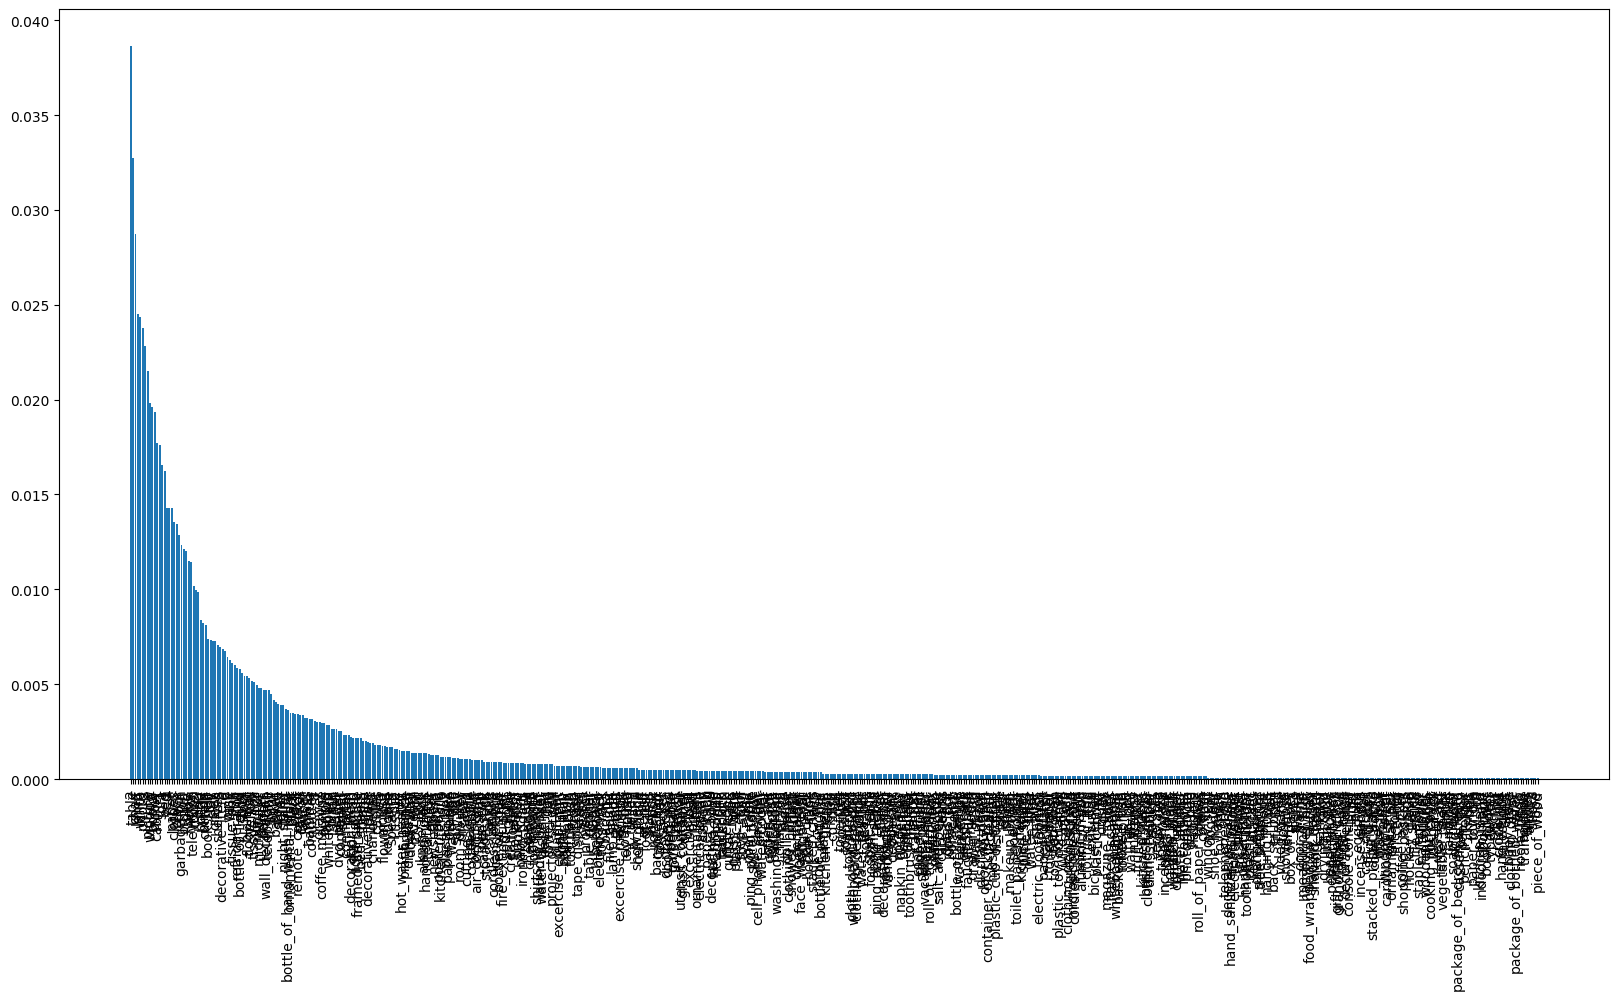

In [19]:
# Plot the probability as a bar chart
plt.figure(figsize=(20, 10))
plt.bar(daquar_answers_counts_df["answer"], daquar_answers_counts_df["probability"])
plt.xticks(rotation=90)
plt.show()

In [20]:
most_common_answers = daquar_answers_counts_df[
    daquar_answers_counts_df["probability"] >= 0.005
].sort_values("probability", ascending=False)
len(most_common_answers), len(daquar_answers_counts)

(52, 582)

## VQA V2 Sample dataset

In [ ]:
# Analyze the unique answers for the sample dataset
from utils.datasets.vqa_v2 import load_vqa_v2_sample_train_dataset , \
    load_vqa_v2_sample_val_dataset, load_vqa_v2_sample_test_dataset, load_vqa_v2_sample_answers_space
from pipelines.process_vqa_v2_sample import get_answers_space

train_data = load_vqa_v2_sample_train_dataset()
val_data = load_vqa_v2_sample_val_dataset()
test_data = load_vqa_v2_sample_test_dataset()

vqa_v2_sample_answer_space_df = load_vqa_v2_sample_answers_space()
all_vqa_v2_sample_answers_df = get_answers_space(
    train_data, val_data, test_data, drop_duplicates=False
)

Found cached dataset parquet (/home/vlad/.cache/huggingface/datasets/Multimodal-Fatima___parquet/Multimodal-Fatima--VQAv2_sample_train-ac3deef7369717ba/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
Found cached dataset parquet (/home/vlad/.cache/huggingface/datasets/Multimodal-Fatima___parquet/Multimodal-Fatima--VQAv2_sample_validation-a10336c8228e86d2/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


In [21]:
all_vqa_v2_sample_answers_df

NameError: name 'all_vqa_v2_sample_answers_df' is not defined